In [ ]:
!git clone https://github.com/LizaDerb/probing_compositionality

Cloning into 'probing_compositionality'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 160 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (160/160), 58.53 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Updating files: 100% (28/28), done.


In [ ]:
import pandas as pd

# Подготовка данных

In [ ]:
rus = pd.read_csv('/content/probing_compositionality/data/rus/extended_vp_corpus.csv', sep=';')
eng_test = pd.read_csv('/content/probing_compositionality/data/eng/TEST-Test.csv')
eng_train = pd.read_csv('/content/probing_compositionality/data/eng/TEST-Train.csv')

Одно и то же выражение имеет и буквальное, и идиоматическое употребление. Все выражения - VP.

In [ ]:
print(len(eng_test['mwe'].unique()))
print(len(eng_train['mwe'].unique()))

14
14


In [ ]:
eng_train = eng_train[['mwe', 'label', 'sentence']]
eng_test = eng_test[['mwe', 'label', 'sentence']]
eng_train

,mwe,label,sentence
0,make_mark,I,For 16 months like a prince in medieval Englan...
1,make_scene,L,But they had made a pleasant enough scene one ...
2,have_word,I,I was in a bad mood and he kept pestering me s...
3,have_word,I,Either I have your word on It or I am afraid y...
4,blow_whistle,L,Needless to say the ref blew the whistle exact...
...,...,...,...
4695,blow_whistle,I,However a shocked Danish bureaucrat blew the w...
4696,make_mark,I,However with Grobbelaar approaching full fitne...
4697,make_mark,I,After ten years building warehouses they moved...
4698,make_hay,L,B. On the lowland plains more fodder crops inc...


In [ ]:
print('train: ', len(eng_train))
print('test: ', len(eng_test))

train:  4700
test:  1430


<Axes: xlabel='mwe'>

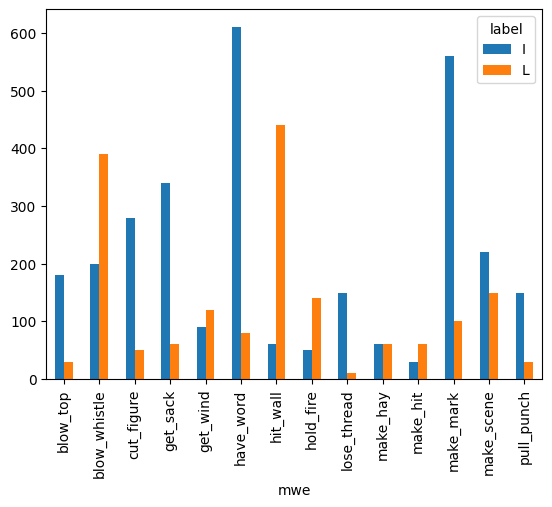

In [ ]:
eng_train.groupby(['mwe', 'label']).size().unstack().plot(kind='bar')

<Axes: xlabel='mwe'>

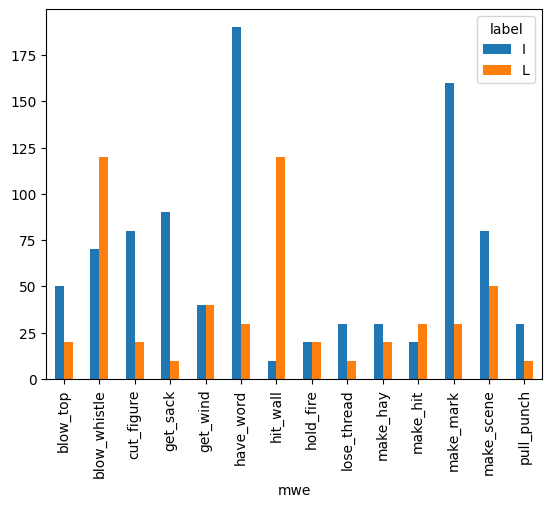

In [ ]:
eng_test.groupby(['mwe', 'label']).size().unstack().plot(kind='bar')

<Axes: xlabel='mwe'>

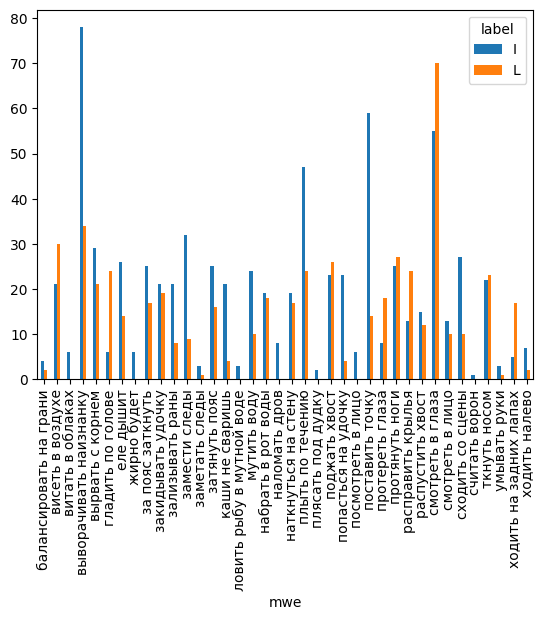

In [ ]:
rus.groupby(['mwe', 'label']).size().unstack().plot(kind='bar')

In [ ]:
num_idiom = rus['mwe'].value_counts()
num_idiom

mwe
смотреть в глаза             125
выворачивать наизнанку       112
поставить точку               73
плыть по течению              71
протянуть ноги                52
висеть в воздухе              51
вырвать с корнем              50
поджать хвост                 49
ткнуть носом                  45
за пояс заткнуть              42
замести следы                 41
затянуть пояс                 41
закидывать удочку             40
еле дышит                     40
набрать в рот воды            37
сходить со сцены              37
расправить крылья             37
наткнуться на стену           36
мутить воду                   34
гладить по голове             30
зализывать раны               29
попасться на удочку           27
распустить хвост              27
протереть глаза               26
каши не сваришь               25
смотреть в лицо               23
ходить на задних лапах        22
ходить налево                  9
наломать дров                  8
жирно будет                    6
баланс

In [ ]:
len(num_idiom)

38

In [ ]:
idiom_train = num_idiom[:14].index.tolist()
idiom_test = num_idiom[14:].index.tolist()

In [ ]:
rus_train = rus[rus['mwe'].isin(idiom_train)].rename(columns={'short_sentence' : 'sentence'})
rus_test = rus[rus['mwe'].isin(idiom_test)].rename(columns={'short_sentence' : 'sentence'})

In [ ]:
rus_train = rus_train.dropna()

In [ ]:
rus_train

,mwe,label,sentence
36,поставить точку,I,30 июня 1994 года я выступила в газете Диена с...
37,поставить точку,I,BRА потом я ушел в тяжелой тоске. Тут бы надо ...
38,поставить точку,I,"Надо, так сказать, поставить точку на первой ..."
39,поставить точку,I,"- Переехать в богадельню - значит, самой поста..."
40,поставить точку,I,"Все, решил - еду в Мадрид. Настало время поста..."
...,...,...,...
1252,ткнуть носом,L,-Но волчица лишь тихо ткнула носом неугомонног...
1253,ткнуть носом,L,-Но волчица лишь тихо ткнула носом неугомонног...
1254,ткнуть носом,I,Но сейчас судьба бесцеремонно ткнула носом в с...
1255,ткнуть носом,L,"Лысый сноровисто сдёрнул рюкзак, отстегнул с е..."


In [ ]:
print('train: ', len(rus_train))
print('test: ', len(rus_test))

train:  830
test:  445


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_eng = Dataset.from_pandas(eng_train)
test_eng = Dataset.from_pandas(eng_test)


train_rus = Dataset.from_pandas(rus_train)
test_rus = Dataset.from_pandas(rus_test)

In [ ]:
le = LabelEncoder()
le.fit(train_eng['label'])

LabelEncoder()

In [ ]:
train_labels_eng = le.transform(train_eng['label'])
test_labels_eng = le.transform(test_eng['label'])

train_labels_rus = le.transform(train_rus['label'])
test_labels_rus = le.transform(test_rus['label'])

In [ ]:
train_eng

Dataset({
    features: ['mwe', 'label', 'sentence'],
    num_rows: 4700
})

In [ ]:
train_rus

Dataset({
    features: ['mwe', 'label', 'sentence', '__index_level_0__'],
    num_rows: 830
})

# MultilingualBert

In [ ]:
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import warnings
import random
import pickle

import torch
from torch.utils.data import DataLoader

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn import preprocessing
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/bert-base-multilingual-cased-sentence')
bert = AutoModel.from_pretrained('DeepPavlov/bert-base-multilingual-cased-sentence')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device_cuda = torch.device("cuda")
device_cpu = torch.device("cpu")

In [ ]:
def vectorize_dataset(data, tokenizer, model):
    model = model.to(device_cuda)
    res_cls = []
    res_mean = []
    for batch in tqdm(data):
        toks = tokenizer(batch['sentence'], padding='max_length', truncation=True, return_tensors='pt', max_length=300)
        with torch.no_grad():
            model_output = model(**{k: v.to(model.device) for k, v in toks.items()})
        res_cls.append(model_output.last_hidden_state[:,0,:]) #достаём вектора для CLS токенов
        res_mean.append(torch.mean(model_output.last_hidden_state, dim=1)) #среднее
    res_cls = torch.vstack(res_cls)
    res_mean = torch.vstack(res_mean)
    return res_cls.detach().cpu().numpy(), res_mean.detach().cpu().numpy()

In [ ]:
dl_train_eng = DataLoader(train_eng, batch_size=256, shuffle=False,
                drop_last=False)
dl_test_eng = DataLoader(test_eng, batch_size=256, shuffle=False,
                drop_last=False)
vecs_train_cls_eng, vecs_train_mean_eng = vectorize_dataset(dl_train_eng, tokenizer, bert)
vecs_test_cls_eng, vecs_test_mean_eng = vectorize_dataset(dl_test_eng, tokenizer, bert)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
dl_train_rus = DataLoader(train_rus, batch_size=256, shuffle=False,
                drop_last=False)
dl_test_rus = DataLoader(test_rus, batch_size=256, shuffle=False,
                drop_last=False)
vecs_train_cls_rus, vecs_train_mean_rus = vectorize_dataset(dl_train_rus, tokenizer, bert)
vecs_test_cls_rus, vecs_test_mean_rus = vectorize_dataset(dl_test_rus, tokenizer, bert)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
vectors_eng = {'vecs_train_cls_eng' : vecs_train_cls_eng, 'vecs_train_mean_eng' : vecs_train_mean_eng,
           'vecs_test_cls_eng' : vecs_test_cls_eng, 'vecs_test_mean_eng' : vecs_test_mean_eng}

for name in vectors_eng.keys():
    with open(f'{name}.pkl', 'wb') as file:
         pickle.dump(vectors_eng[name], file)

In [ ]:
vector_names_eng = ['vecs_train_cls_eng', 'vecs_train_mean_eng', 'vecs_test_cls_eng', 'vecs_test_mean_eng']
vecs_eng = []

for name in vector_names_eng:
    with open(f'{name}.pkl', "rb") as fIn:
        vecs_eng.append(pickle.load(fIn))

train_cls_eng = vecs_eng[0]
train_mean_eng = vecs_eng[1]
test_cls_eng = vecs_eng[2]
test_mean_eng = vecs_eng[3]

In [ ]:
vectors_rus = {'vecs_train_cls_rus' : vecs_train_cls_rus, 'vecs_train_mean_rus' : vecs_train_mean_rus,
           'vecs_test_cls_rus' : vecs_test_cls_rus, 'vecs_test_mean_rus' : vecs_test_mean_rus}

for name in vectors_rus.keys():
    with open(f'{name}.pkl', 'wb') as file:
         pickle.dump(vectors_rus[name], file)

In [ ]:
vector_names_rus = ['vecs_train_cls_rus', 'vecs_train_mean_rus', 'vecs_test_cls_rus', 'vecs_test_mean_rus']
vecs_rus = []

for name in vector_names_rus:
    with open(f'{name}.pkl', "rb") as fIn:
        vecs_rus.append(pickle.load(fIn))

train_cls_rus = vecs_rus[0]
train_mean_rus = vecs_rus[1]
test_cls_rus = vecs_rus[2]
test_mean_rus = vecs_rus[3]

In [ ]:
train_cls_eng.shape

(4700, 768)

In [ ]:
test_mean_rus.shape

(445, 768)

In [ ]:
def calculate_metrics(true_labels, predictions):
    matrix = confusion_matrix(true_labels, predictions)
    acc = accuracy_score(true_labels, predictions)
    prec = precision_score(true_labels, predictions)
    rec = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    auc_pred = roc_auc_score(true_labels, predictions)
    return matrix, acc, prec, rec, f1, auc_pred

In [ ]:
def baseline_rand_vec(vecs):
    size = vecs.shape[1]
    num_vecs = vecs.shape[0]
    rand_vecs = []
    for _ in range(num_vecs):
        rand_vecs.append(np.random.uniform(-5.0826163,1.5603778,size))
    return rand_vecs

def baseline_rand_pred(vecs, labels):
    num_vecs = vecs.shape[0]
    rand_vecs = []
    rand_pred = np.array(range(num_vecs), dtype=int)
    for i in range(0, num_vecs):
        rand_pred[i] = random.choice(labels)
    return rand_pred

In [ ]:
def rand_pred_func(vecs, labels, true_labels, n=50):
    results_rand_pred = []
    for _ in range(n):
        pred_labels = baseline_rand_pred(vecs, labels)
        results_rand_pred.append(calculate_metrics(true_labels, pred_labels))
    res_rand_pred = pd.DataFrame(results_rand_pred, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
    return res_rand_pred

In [ ]:
def get_results(train_data, train_labels, test_data, test_labels):
    results_train = []
    results_test = []
    for n in tqdm(range(50)):
        clf = MLPClassifier(random_state=n, max_iter=300, verbose=1)
        clf.fit(train_data, train_labels)
        train_pred = clf.predict(train_data)
        test_pred = clf.predict(test_data)
        results_train.append(calculate_metrics(train_labels, train_pred))
        results_test.append(calculate_metrics(test_labels, test_pred))
    return results_train, results_test

In [ ]:
labels = [0, 1]

In [ ]:
rand_pred_func(test_cls_eng, labels, test_labels_eng).to_csv('res_rand_pred_eng.csv')
rand_pred_func(test_cls_rus, labels, test_labels_rus).to_csv('res_rand_pred_rus.csv')

In [ ]:
rand_vecs_eng = baseline_rand_vec(train_cls_eng)
results_train_rand_eng, results_test_rand_eng = get_results(rand_vecs_eng, train_labels_eng, test_cls_eng, test_labels_eng)
res_test_rand_eng = pd.DataFrame(results_test_rand_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_rand_eng = pd.DataFrame(results_train_rand_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_rand_eng.to_csv('res_test_rand_vec_eng.csv')
res_train_rand_eng.to_csv('res_train_rand_vec_eng.csv')

In [ ]:
rand_vecs_rus = baseline_rand_vec(train_cls_rus)
results_train_rand_rus, results_test_rand_rus = get_results(rand_vecs_rus, train_labels_rus, test_cls_rus, test_labels_rus)
res_test_rand_rus = pd.DataFrame(results_test_rand_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_rand_rus = pd.DataFrame(results_train_rand_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_rand_rus.to_csv('res_test_rand_vec_rus.csv')
res_train_rand_rus.to_csv('res_train_rand_vec_rus.csv')

In [ ]:
results_train_mean_eng, results_test_mean_eng = get_results(train_mean_eng, train_labels_eng, test_mean_eng, test_labels_eng)
res_test_mean_eng = pd.DataFrame(results_test_mean_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_mean_eng = pd.DataFrame(results_train_mean_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_mean_eng.to_csv('res_test_mean_eng.csv')
res_train_mean_eng.to_csv('res_train_mean_eng.csv')

In [ ]:
results_train_mean_rus, results_test_mean_rus = get_results(train_mean_rus, train_labels_rus, test_mean_rus, test_labels_rus)
res_test_mean_rus = pd.DataFrame(results_test_mean_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_mean_rus = pd.DataFrame(results_train_mean_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_mean_rus.to_csv('res_test_mean_rus.csv')
res_train_mean_rus.to_csv('res_train_mean_rus.csv')

In [ ]:
results_train_cls_eng, results_test_cls_eng = get_results(train_cls_eng, train_labels_eng, test_cls_eng, test_labels_eng)
res_test_cls_eng = pd.DataFrame(results_test_cls_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_cls_eng = pd.DataFrame(results_train_cls_eng, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_cls_eng.to_csv('res_test_cls_eng.csv')
res_train_cls_eng.to_csv('res_train_cls_eng.csv')

In [ ]:
results_train_cls_rus, results_test_cls_rus = get_results(train_cls_rus, train_labels_rus, test_cls_rus, test_labels_rus)
res_test_cls_rus = pd.DataFrame(results_test_cls_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_train_cls_rus = pd.DataFrame(results_train_cls_rus, columns=['matrix', 'accuracy', 'precision', 'recall', 'f1', 'auc_pred'])
res_test_cls_rus.to_csv('res_test_cls_rus.csv')
res_train_cls_rus.to_csv('res_train_cls_rus.csv')

In [ ]:
!zip -r /content/file.zip /content

In [ ]:
from google.colab import files
files.download("file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>